<a href="https://colab.research.google.com/github/JGPB0/CS/blob/main/Lab3/CS_lab3_ParedesJimmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Asymmetric (Public) Key

##Paredes Jimmy


##Exercise 1: RSA Cryptosystem.

###1. The openssl tool provides specific commands for key generation of some public key encryption schemes. The command genpkey is used to generate a public / secret keypair. The way this command is used depends on the selected public key algorithm.
`$ openssl genpkey -algorithm rsa`

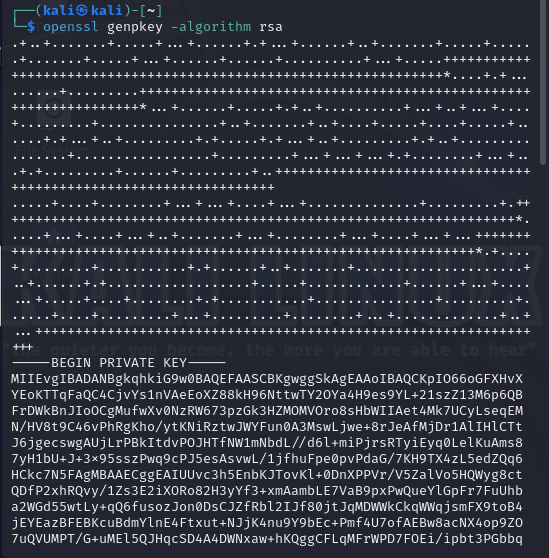

###2. The text output is given in PEM (Privacy-Enhanced Mail) format, but you can also produce a human readable text format by adding the option -text to the command line:
`$ openssl genpkey -algorithm rsa -text`

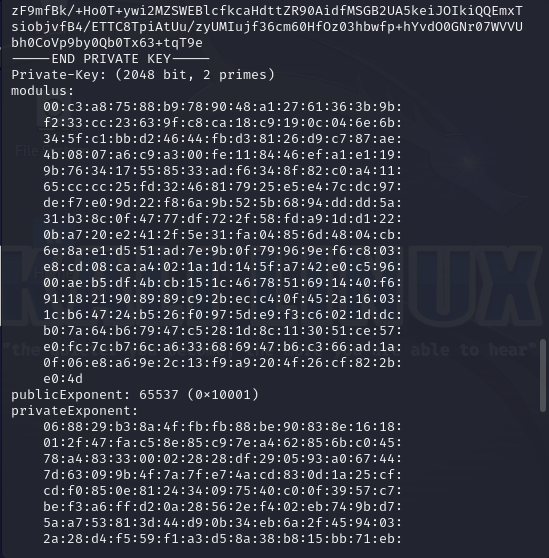


###3. In this version of OpenSSL (1.1.1s), the defaults for RSA are a size of 2048 bits and the public exponent 65537. The additional fields named exponent1, exponent2 and coefficient are given for optimization of the decryption operation. You can override the default parameters by providing the desired values via the option -pkeyopt . For instance,

`$ openssl genpkey -algorithm rsa -pkeyopt rsa_keygen_bits:512 -pkeyopt rsa_keygen_pubexp:17 will use the (insecure) specified values for the key generation.`

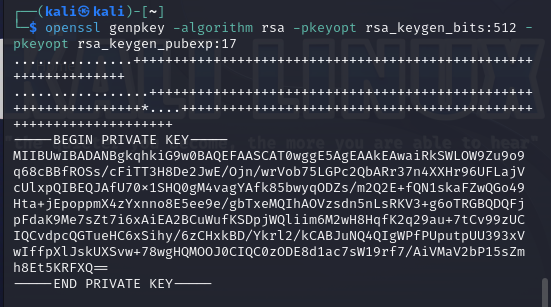


###4. Secure the encrypted key with 128-bit AES
  * Generate a key pair with:

  `$ openssl genrsa -out private.pem 1024`

  * Next we view the RSA key pair:

  `$ openssl rsa -in private.pem -text`

  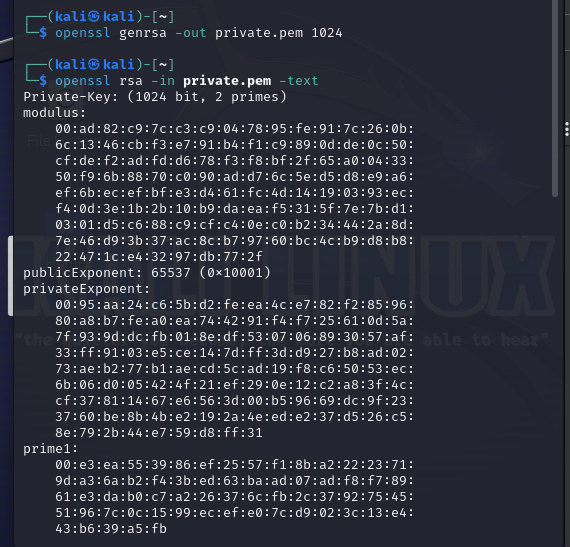

  * Now secure the encrypted key with 128-bit AES:

 `$ openssl rsa -in private.pem -aes128 -out key3des.pem`
  
  * Next we will export the public key:
  
  `$ openssl rsa -in key3des.pem -out public.pem -outform PEM -pubout`
  
  * Create a file named **myfile.txt** and put a message into it. Next encrypt it with your public key:

  `$ openssl pkeyutl -encrypt -inkey public.pem -pubin -in myfile.txt -out file.bin`
  
  * And then decrypt with your private key:

  `$ openssl pkeyutl -decrypt -inkey key3des.pem -in file.bin -out decrypted.txt`

  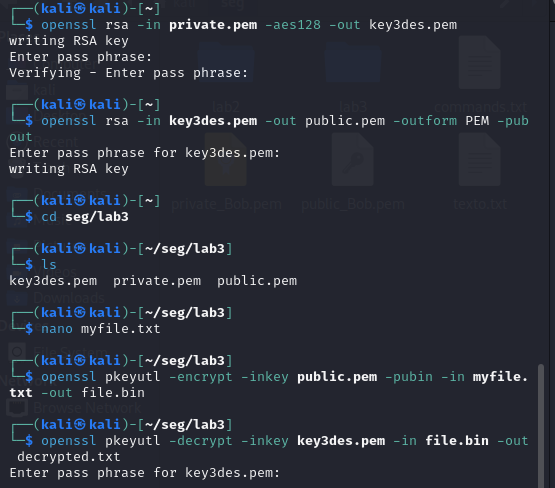
  
  * What can you observe between these two commands for differing output formats:
  ```
  $ openssl pkeyutl -encrypt -inkey public.pem -pubin -in myfile.txt -out file.bin
  $ cat file.bin
  ```

  * and
  ```
  $ openssl pkeyutl -encrypt -inkey public.pem -pubin -in myfile.txt -out file.bin -hexdump
  $ cat file.bin
  ```
  
  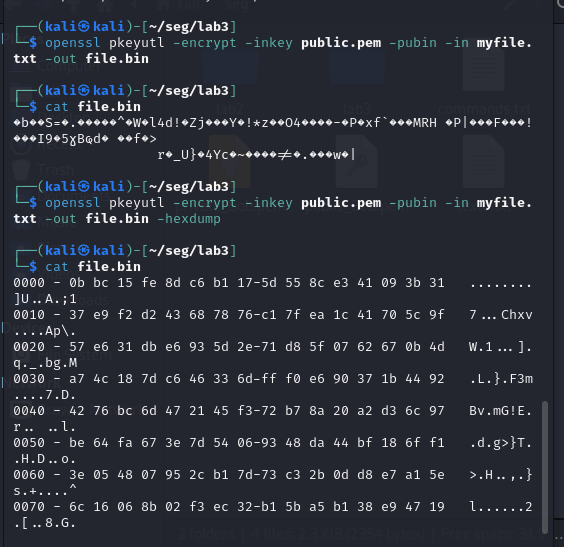

  The output format change, in the first pat there is a binary format while in the second one we have in hexadecimal format.


###5. Generate an RSA key pair with a key length of 2048 bits using a cryptographic library (e.g., OpenSSL).
  * Calculate the modulus (n), public exponent (e), and private exponent (d) of the generated key pair.

    * This command generates a private key and save it to a file named private key.pem.

      `$ openssl genpkey -algorithm RSA -out private_key.pem -pkeyopt rsa_keygen_bits:2048`

      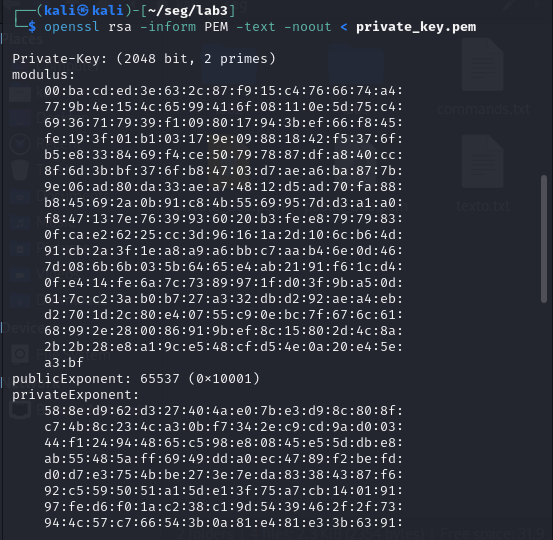

    * This command extracts the public key from the private key and save it to a file named public key.pem.

      `$ openssl rsa -pubout -in private_key.pem -out public_key.pem`

      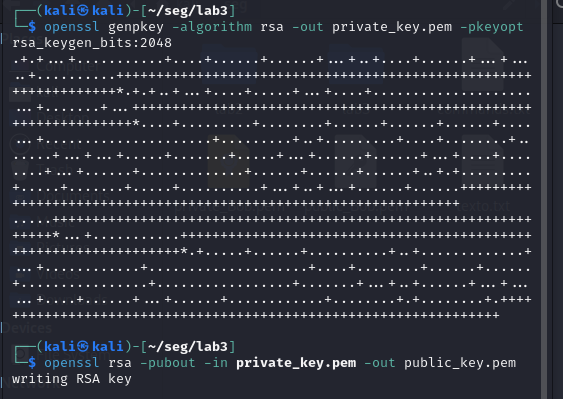

  * Discuss the significance of each component and its role in RSA encryption and decryption.

  Every component in RSA is important because to encrypt a message we use the public key (n, e) which is freely distributed and to decrypt the message we use the private key (n, d), which one must be kept secure.

###6. Key Length and Security:
  * Generate RSA key pairs with different key lengths (e.g., 1024, 2048 bits).

  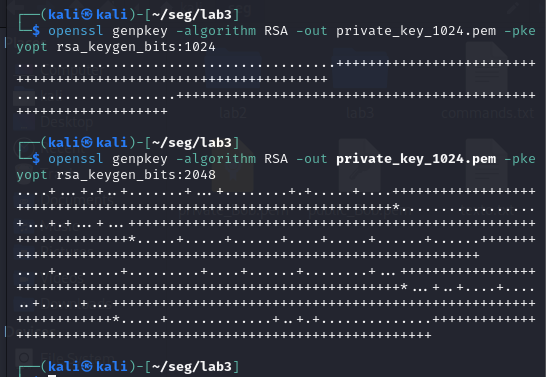

  * Compare the time required for key generation and encryption/decryption for each key length.

  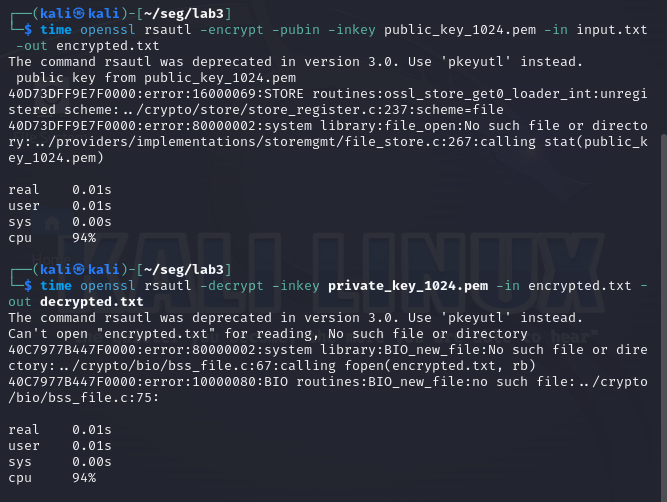

  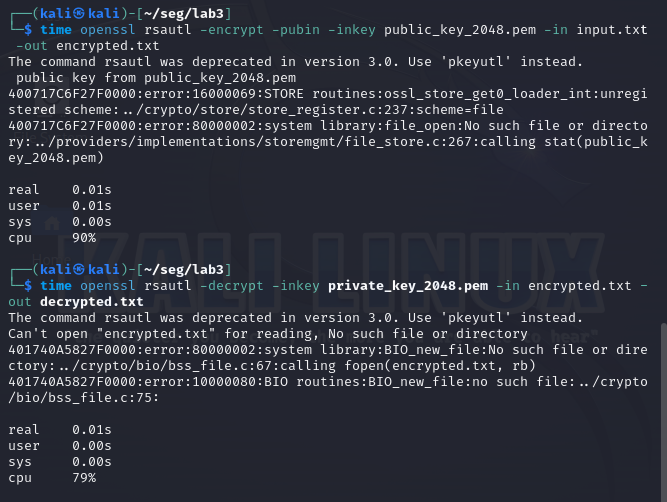

  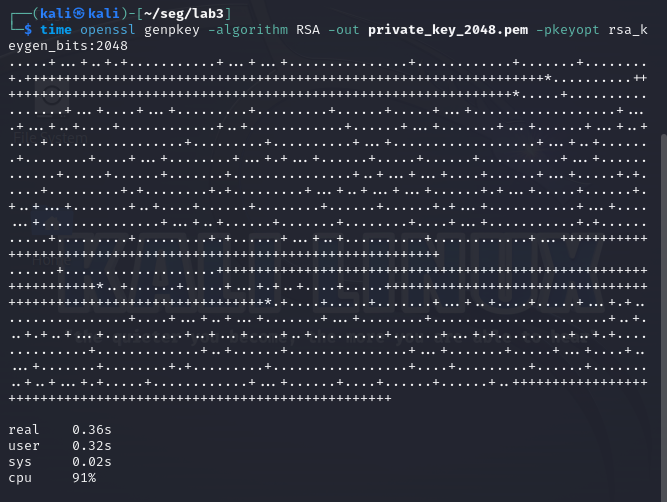

  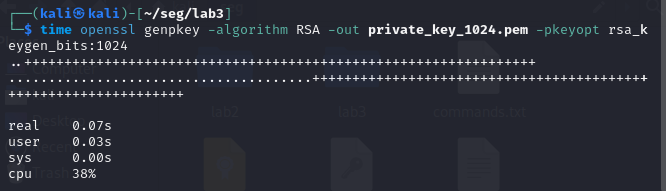

  In theencryption and decryptio the time needed to operate with 1024 and 2048 it is very similar. On the other hand, the time needed to create the key with 1024 bits was 0.07 seconds while the time needed to create a key with 2048 bits was 0.36 seconds. In this case, the difference in the times is too big.

  * Discuss the tradeoff between security and computational efficiency.

  It is imortant to take into consideration that there is a significant difference in the time needed to create the keys with different bit sizes as it was explained before. Also, it is important to have better security, which is possible having bigger keys. So, people must take into account that having more security means more computational resources and time required. The decision of the key size will depend in the needs of the person or company.

###7. To encrypt a secret message msg = 83. Assume we have generated the RSA public-private key pair:
  * public key = {n, e} = {143, 7}
  * private key = {n, d} = {143, 103}

In [ ]:
msg = 83; e = 7; d = 103; n = 143

# Encrypt
encrypted = (msg ** e) % n

# Decrypt
decrypted = (encrypted ** d) % n

print("Encrypted message:", encrypted)
print("Decrypted message:", decrypted)

Encrypted message: 8
Decrypted message: 83


###8. Bob has a public RSA key of:

MIICXAIBAAKBgQCwgjkeoyCXm9v6VBnUi5ihQ2knkdxGDL3GXLIUU43/froeqk7q9mtxT4AnPAaDX3f2r4STZYYiqXGsH
CUBZcI90dvZf6YiEM5OY2jgsmqBjf2Xkp/8HgN/XDw/wD2+zebYGLLYtd2u3GXx9edqJ8kQcU9LaMH+ficFQyfq9UwTjQ
IDAQABAoGAD7L1a6Ess+9b6G70gTANWkKJpshVZDGb63mxKRepaJEX8sRJEqLqOYDNsC+pkKO8IsfHreh4vrp9bsZuECr
B1OHSjwDB0S/fm3KEWbsaaXDUAu0dQg/JBMXAKzeATreoIYJItYgwzrJ++fuquKabAZumvOnWJyBIs2z103kDz2ECQQDn
n3JpHirmgVdf81yBbAJaXBXNIPzOcCth1zwFAs4EvrE35n2HvUQuRhy3ahUKXsKX/bGvWzmC2O6kbLTFEygVAkEAwxXZn
PkaAY2vuoUCN5NbLZgegrAtmU+U2woa5A0fx6uXmShqxo1iDxEC71FbNIgHBg5srsUyDj3OsloLmDVjmQJAIy7qLyOA+s
Cc6BtMavBgLx+bxCwFmsoZHOSX3l79smTRAJ/HY64RREIsLIQ1q/yW7IWBzxQ5WTHgliNZFjKBvQJBAL3t/vCJwRz0Ebs
5FaB/8UwhhsrbtXlGdnkOjIGsmV0vHSf6poHqUiay/DV88pvhN11ZG8zHpeUhnaQccJ9ekzkCQDHHG9LYCOqTgsyYms//
cW4sv2nuOE1UezTjUFeqOlsgO+WN96b/M5gnv45/Z3xZxzJ4HOCJ/NRwxNOtEUkw+zY=

  * And receives a ciphertext message of:
  
Pob7AQZZSml618nMwTpx3V74N45x/rTimUQeTl0yHq8F0dsekZgOT385Jls1HUzWCx6ZRFPFMJ1RNYR2Yh7AkQtFLVx9l
YDfb/Q+SkinBIBX59ER3/fDhrVKxIN4S6h2QmMSRblh4KdVhyY6cOxu+g48Jh7TkQ2Ig93/nCpAnYQ=

  * What is the plaintext message that Bob has been sent?

      It is not possible to calculate because we do not have any information related to the private key.

In [ ]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


##Exercise 2: ElGamal Cryptosystem

###1. Let’s assume that Alice wants to send an encrypted message to Bob using ElGamal. The public parameters are:

```
  * Prime number p = 23.
  * Generator g = 5 = α.
  * Bob’s public key is y = 19 = β.
  * Alice wants to encrypt the message m = 10 = x.
```

Develop the complete process of encryption and decryption of the message m using the ElGamal algorithm

```
β = αᵈ mod 23
5ᵈ mod 23 = 19
d = 15

So, we have:
k_pub = {p, α, β} -> k_pub = {23, 5, 19}
k_pr = {p, d} -> {23, 37}

Encryption:
x = 10 < p
Select random integer iϵ{2,3,...,p-2} -> iϵ{2,3...,21} -> i=4
ke = αⁱ mod p -> ke = 5⁴ mod 23 -> ke = 4
km = βⁱ mod p -> km = 19⁴ mod 23 -> km = 3
encrypt message: y = x * km mod p -> y = 10*3 mod 23 -> y = 30mod 23 -> y = 7

Decryption:
encrypt message: (ke, y) -> (4, 7)
km = keᵈ mod p -> km = 4¹⁵ mod 23 -> km = 3
decrypt message x: x = y*km⁻¹ mod p -> x = 7*3⁻¹ mod p -> 7*8 mod 23 -> x = 10

```





###2. Develop a Python application for ElGamal encryption and decryption to ensure secure communication.

In [ ]:
import random

def mod_exp(base, exp, mod):
    result = 1
    base = base % mod

    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % mod
        exp = exp // 2
        base = (base * base) % mod

    return result

def generate_keypair(p, g):
    private_key = random.randint(1, p - 1)
    public_key = mod_exp(g, private_key, p)
    return private_key, public_key

def encrypt(m, public_key, p, g):
    k = random.randint(1, p - 1)
    a = mod_exp(g, k, p)
    b = (mod_exp(public_key, k, p) * m) % p
    return a, b

def decrypt(ciphertext, private_key, p):
    a, b = ciphertext
    s = mod_exp(a, private_key, p)
    s_inverse = pow(s, -1, p)
    decrypted_message = (b * s_inverse) % p
    return decrypted_message

def main():
    # Public parameters
    p = 23
    g = 5

    # Bob's key generation
    bob_private, bob_public = generate_keypair(p, g)

    # Alice's encryption
    message = 10
    ciphertext = encrypt(message, bob_public, p, g)

    # Bob's decryption
    decrypted_message = decrypt(ciphertext, bob_private, p)

    print("Original Message:", message)
    print("Encrypted Ciphertext:", ciphertext)
    print("Decrypted Message:", decrypted_message)

if __name__ == "__main__":
    main()


Original Message: 10
Encrypted Ciphertext: (2, 7)
Decrypted Message: 10


##Exercise 3: Diffie-Hellman key exchange

###1. Alice and Bob want to establish a shared secret key using the Diffie-Hellman key exchange algorithm. They agree on the following parameters:

```
    * Prime number (p): 23
    * Base (g): 5
```

  * What are the values of A and B (Alice’s and Bob’s public keys) based on their chosen private keys?

```
Bob:
b = kpr, Bϵ{2,3,...,p-2} -> Bϵ{2,3,...,21} -> b = 3
B = k_pub, B -> B = gᵇ mod p -> B = 5³ mod 23 -> B = 10

Alice:
a = kpr, Aϵ{2,3,...,p-2} -> Aϵ{2,3,...,21} -> a = 3
A = k_pub, A -> A = gᵃ mod p -> A = 5⁵ mod 23 -> A = 20

So, the values A and B are 20, 10 respectively.
```

  * Calculate the shared secret key (K) using the Diffie-Hellman algorithm.

```
key = (gᵃᵇ)(mod p) -> key = (5⁵*³)(mod 23) -> key = 5¹⁵ mod 23 -> key = 19
```

  * Verify if Alice and Bob have the same shared secret key.

```
Bob:
key = Aᵇ mod 23 -> key = 20³ mod 23 -> key = 19

Alice:
key = Bᵃ mod 23 -> key = 10⁵ mod 23 -> key = 19
```

###2. Write a Python program that implements the Diffie-Hellman key exchange algorithm to establish a shared secret key between Alice and Bob. The program should utilize the given parameters and calculate the public keys and shared secret keys for both parties and verify if the shared secret keys match.

In [1]:
def mod_exp(base, exp, modulus):
    result = 1
    base = base % modulus
    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % modulus
        exp = exp >> 1
        base = (base * base) % modulus
    return result

# Parameters
p = 23  # Prime number
g = 5   # Generator

# Alice's private key
a_private = 6

# Bob's private key
b_private = 15

# Calculate Alice's public key
a_public = mod_exp(g, a_private, p)

# Calculate Bob's public key
b_public = mod_exp(g, b_private, p)

# Calculate the shared secret key for Alice
shared_secret_alice = mod_exp(b_public, a_private, p)

# Calculate the shared secret key for Bob
shared_secret_bob = mod_exp(a_public, b_private, p)

# Verify if the shared secret keys match
if shared_secret_alice == shared_secret_bob:
    print("Shared secret keys match!")
    print("Shared Secret Key:", shared_secret_alice)
else:
    print("Error: Shared secret keys do not match!")


Shared secret keys match!
Shared Secret Key: 2


##Exercise 4: Elliptic Curves over Finite Fields

###1. Elliptic Curve Order and Cofactor:
  * Determine the order of the secp256k1 elliptic curve used in Bitcoin.

      Due to the order is the same as the size of the prime number, the order of the curve is 256 bit lenght.

  * Find the cofactor of the secp256k1 elliptic curve.

      The cofactor os the secp256k1 is equal to 1.

  * Determine the cofactor of the Curve25519 elliptic curve.


  * Find the cofactor of the Curve448 elliptic curve.
  
  * Determine the order of the Curve25519 elliptic curve.

###2. Multiplication of EC Points.
  * Install the Python library tinyec which provides ECC primitives by executing: $ pip install tinyec
  
  * Utilize the educational curve defined by the equation y² ≡ x³ + 7 (mod 17), with the generator point G = [15, 13] having an order of n = 18.

###3. Point Addition on an Elliptic Curve over Finite Fields. Consider the elliptic curve defined by the equation: y² ≡ x³ + 7 (mod 17). Given the point P1 = (5, 8) and the point P2 = (12, 6) on this curve, calculate the sum of P1 and P2 to obtain the resulting point P3.



It is not possible because the point (12, 6) does not belong to the Elliptic Curve.
But, in order to show an example of addition of two points, the next code is used with the point (12, 16) instead of the point (12, 6):

In [25]:
def extended_gcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, x, y = extended_gcd(b % a, a)
        return (g, y - (b // a) * x, x)

def modinv(a, m):
    g, x, _ = extended_gcd(a, m)
    if g != 1:
        raise Exception('Modular inverse does not exist')
    else:
        return x % m

def point_addition(P, Q, a, p):
    if P == 'O':
        return Q
    elif Q == 'O':
        return P

    x_p, y_p = P
    x_q, y_q = Q

    if P != Q:
        m = ((y_q - y_p) * modinv((x_q - x_p) % p, p)) % p
    else:
        m = ((3 * x_p**2 + a) * modinv((2 * y_p) % p, p)) % p

    x_r = (m**2 - x_p - x_q) % p
    y_r = (m * (x_p - x_r) - y_p) % p

    return (x_r, y_r)

# y² = x³ + ax + b (mod p)
# y² = x³ + 0x + 7 (mod 17)

a = 0
b = 7
p = 17  # Prime field order
G = (5, 8)  # Generator point
P = (12, 16)  # Point on the curve

# Calculate Q = P + G
Q = point_addition(P, G, a, p)
print(f'P + G = {Q}')


P + G = (2, 10)


###4. Point Multiplication on an Elliptic Curve over Finite Fields. Consider the same elliptic curve defined by the equation: y² ≡ x³ +7 (mod 17). Given the point P = (3, 1) on this curve, calculate the result of multiplying P by an integer scalar k = 5 to obtain the resulting point Q.

In [31]:
def extended_gcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, x, y = extended_gcd(b % a, a)
        return (g, y - (b // a) * x, x)

def modinv(a, m):
    g, x, _ = extended_gcd(a, m)
    if g != 1:
        raise Exception('Modular inverse does not exist')
    else:
        return x % m

def point_addition(P, Q, a, p):
    if P == 'O':
        return Q
    elif Q == 'O':
        return P

    x_p, y_p = P
    x_q, y_q = Q

    if P != Q:
        m = ((y_q - y_p) * modinv((x_q - x_p) % p, p)) % p
    else:
        m = ((3 * x_p**2 + a) * modinv((2 * y_p) % p, p)) % p

    x_r = (m**2 - x_p - x_q) % p
    y_r = (m * (x_p - x_r) - y_p) % p

    return (x_r, y_r)

def double_and_add(P, k, a, p):
    Q = 'O'  # Point at infinity
    binary_k = bin(k)[2:]  # Binary representation of k

    for bit in binary_k:
        Q = point_addition(Q, Q, a, p)  # Double the point

        if bit == '1':
            Q = point_addition(Q, P, a, p)  # Add the original point

    return Q

# y² = x³ + ax + b (mod p)
# y² = x³ + 0x + 7 (mod 17)

a = 0
b = 7
p = 17  # Prime field order
P = (3,1)  # Generator point
ke = 5  # Scalar multiplier

result = double_and_add(P, ke, a, p)
print(f'{ke} * P = {result}')

5 * P = (12, 6)


##Exercise 5: Choosing an Elliptic Curve for ECC

###1. OpenSSL (ECC)
  * First we need to generate a private key with:

  `$ openssl ecparam -name secp256k1 -genkey -out priv.pem`

  * We can view the details of the ECC parameters used with:

  `$ openssl ecparam -in priv.pem -text -param_enc explicit -noout`

  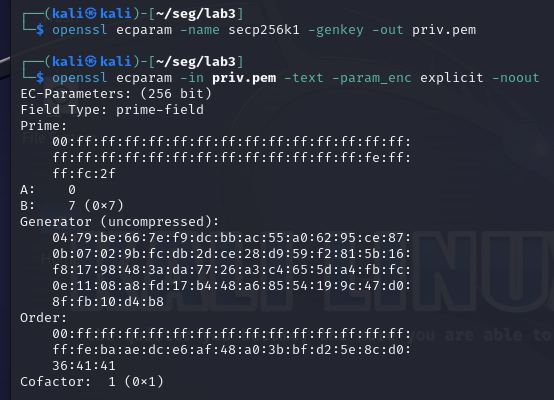

  Outline these values:
    * Prime (last two bytes): A: 0
    * Prime (last two bytes): B: 7
    * Generator (last two bytes): d4b8
    * Order (last two bytes): 4141

  * Now generate your public key based on your private key with:
  ```
  $ openssl ec -in priv.pem -text -noout
  $ openssl ec -in priv.pem -pubout -out public.pem
  ```
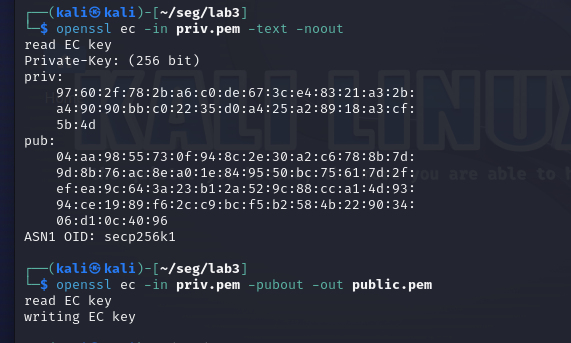

    * i. How many bits and bytes does your private key have?:
      
      bit: 256; bytes: 32

    * ii. How many bit and bytes does your public key have?:

      bit: 520; bytes: 65

  * To display the list of available elliptic curves (EC) in OpenSSL:

  `$ openssl ecparam -list_curves`

  Outline three curves supported:
    * secp256k1
    * prime239v1
    * sect163k1

  * Lets select two other curves:
      ```
      $ openssl ecparam -name secp128r1 -genkey -out priv.pem
      $ openssl ecparam -in priv.pem -text -param_enc explicit -noout
      $ openssl ecparam -name secp521r1 -genkey -out priv.pem
      $ openssl ecparam -in priv.pem -text -param_enc explicit -noout
      ```

  * How does secp128k1, secp256k1 and secp512r1 different in the parameters used? Perhaps identify the length of the prime number used, and the size of the base point (G) and the prime number.

      They differ in the size of their values because it depends in the name itself of the curve used. The base point (G) is too much bigger than the prime number.

  * How does the name of the curve relate to prime number size?

      It is directly related because in the name it is specified the number of bits used in the prime number. For example in secp256k1 the prime number size is 256 bit.

###2. Run the following code on your pc. This code defines an elliptic curve using the libnum library, prints the equation of the curve, and finds the points within the specified range based on the value of p.

In [4]:
!pip install libnum

In [8]:
import sys
from libnum import ecc

# y^2 = x^3 + ax + b (mod p)
a = 5
b = 7
p = 97

if len(sys.argv) > 1:
  a = int(sys.argv[1])
if len(sys.argv) > 2:
  b = int(sys.argv[2])
if len(sys.argv[3]):
  p = int(sys.argv[3])

c = ecc.Curve(a, b, p)
print("y^2 = x^3 + %dx+%d (mod %d)\n" % (a, b, p))

if p < 100:
  print(c.find_points_in_range(1, p-1))
else:
  print(c.find_points_in_range(1, 100))


Running the code with the command `python3 test.py 5 7 97` the following result is obtained:
```
y^2 = x^3 + 5x+7 (mod 97)

[(2, 92), (2, 5), (3, 7), (3, 90), (4, 73), (4, 24), (7, 26), (7, 71), (11, 61), (11, 36), (12, 90), (12, 7), (14, 28), (14, 69), (15, 81), (15, 16), (16, 20), (16, 77), (18, 77), (18, 20), (21, 35), (21, 62), (22, 80), (22, 17), (25, 72), (25, 25), (29, 0), (30, 71), (30, 26), (33, 5), (33, 92), (34, 83), (34, 14), (35, 59), (35, 38), (36, 34), (36, 63), (38, 78), (38, 19), (42, 87), (42, 10), (46, 66), (46, 31), (47, 88), (47, 9), (48, 68), (48, 29), (52, 82), (52, 15), (55, 37), (55, 60), (60, 26), (60, 71), (61, 64), (61, 33), (62, 92), (62, 5), (63, 77), (63, 20), (64, 59), (64, 38), (69, 15), (69, 82), (73, 82), (73, 15), (74, 23), (74, 74), (75, 93), (75, 4), (76, 27), (76, 70), (79, 14), (79, 83), (80, 76), (80, 21), (81, 83), (81, 14), (82, 7), (82, 90), (83, 54), (83, 43), (84, 49), (84, 48), (85, 81), (85, 16), (87, 86), (87, 11), (88, 3), (88, 94), (94, 81), (94, 16), (95, 59), (95, 38), (96, 1), (96, 96)]
```






 * Create an elliptic curve with y² = x³ + 7, and with a prime number of 89, generate the first five (x,y) points for the finite field elliptic curve.

 Using the code provided before, and the command line: `python3 test.py 0 7 89` the following result is obatined:



```
y^2 = x^3 + 0x+7 (mod 89)

[(1, 39), (1, 50), (3, 52), (3, 37), (4, 58), (4, 31), (6, 32), (6, 57), (12, 69), (12, 20), (13, 35), (13, 54), (14, 9), (14, 80), (15, 0), (16, 3), (16, 86), (17, 5), (17, 84), (22, 8), (22, 81), (24, 6), (24, 83), (25, 18), (25, 71), (26, 53), (26, 36), (27, 33), (27, 56), (29, 30), (29, 59), (30, 29), (30, 60), (31, 61), (31, 28), (35, 47), (35, 42), (38, 77), (38, 12), (40, 4), (40, 85), (41, 65), (41, 24), (42, 15), (42, 74), (44, 14), (44, 75), (45, 21), (45, 68), (49, 49), (49, 40), (52, 23), (52, 66), (57, 76), (57, 13), (60, 2), (60, 87), (63, 63), (63, 26), (65, 45), (65, 44), (67, 67), (67, 22), (68, 64), (68, 25), (69, 62), (69, 27), (70, 1), (70, 88), (71, 7), (71, 82), (72, 16), (72, 73), (73, 70), (73, 19), (75, 72), (75, 17), (78, 79), (78, 10), (80, 48), (80, 41), (82, 51), (82, 38), (85, 78), (85, 11), (86, 43), (86, 46), (87, 34), (87, 55)]
```

 So, the first five `(x, y)` points for the finite field elliptic curve are:

 ```
 [(1, 39), (1, 50), (3, 37), (3, 52), (4, 31)]
 ```